In [1]:
import pandas as pd
from sklearn.svm import SVC
import json
import numpy as np

In [2]:
df = pd.read_json('./datasets/final_completed_cleaned.json')

In [3]:
df

,pattern,type
0,crteyreti=wsn&et3tf6shov=tdsviee y fum$oh3;ore...,valid
1,*;q=0.7,valid
2,nhgiopie/7.8.4.7.0,valid
3,/dyylkl.xd9cpu/4ot0ta/ts6xnrp1/hssh/a2cuerht/s...,valid
4,/2m6vlb1r37jspc/cwvv/mbar/oqrd0/msc/etceebwgi/...,valid
...,...,...
90951,"username=admin"") or ""1""=""1",sqli
90952,"username=admin"") or ""1""=""1""--",sqli
90953,"username=admin"") or ""1""=""1""#",sqli
90954,"username=admin"") or ""1""=""1""/*",sqli


<Axes: ylabel='count'>

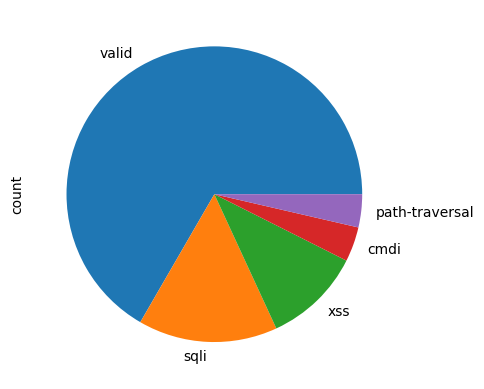

In [4]:
df['type'].value_counts().plot.pie()

In [5]:
X = df['pattern'].to_numpy().astype(str)
y = df['type'].to_numpy().astype(str)

In [6]:
print(len(X))
print(len(y))

90956
90956


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [8]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)
np.savez('dataset', trainX=trainX, testX=testX, trainY=trainY, testY=testY)

In [31]:
pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024), SVC())

param_grid = {'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 4)], 'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf']}

grid = GridSearchCV(pipe, param_grid, cv = 2, verbose = 4)

grid.fit(trainX, trainY)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1);, score=0.958 total time= 1.2min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1);, score=0.960 total time= 1.3min
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2);, score=0.986 total time= 3.4min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2);, score=0.986 total time= 3.4min
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4);, score=0.986 total time= 3.2min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4);, score=0.986 total time= 3.2min
[CV 1/2] END svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1);, score=0.984 total time=  58.5s
[CV 2/2] END svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1);, score=0.982 total time=  58.1s
[CV 1/2] END svc__C=1, svc__kernel=rbf, tfidfvect

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='char',
                                                        max_features=1024)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf'],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 4)]},
             verbose=4)

In [32]:
grid.score(testX, testY)

0.9959540876907516

In [33]:
from sklearn.metrics import classification_report

preds = grid.predict(testX)

print(classification_report(testY, preds))

                precision    recall  f1-score   support

          cmdi       0.98      0.97      0.98       865
path-traversal       0.99      0.97      0.98       822
          sqli       1.00      0.99      0.99      3464
         valid       1.00      1.00      1.00     15156
           xss       1.00      1.00      1.00      2432

      accuracy                           1.00     22739
     macro avg       0.99      0.99      0.99     22739
  weighted avg       1.00      1.00      1.00     22739



In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(testY, preds)

array([[  839,     5,     3,    18,     0],
       [    5,   800,     0,    17,     0],
       [    9,     1,  3433,    21,     0],
       [    2,     0,     2, 15151,     1],
       [    0,     1,     0,     7,  2424]])

In [41]:
grid.best_params_

{'svc__C': 10, 'svc__kernel': 'rbf', 'tfidfvectorizer__ngram_range': (1, 4)}

In [9]:
pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024, ngram_range = (1, 4)), SVC(C = 10, kernel = 'rbf'))

pipe.fit(trainX, trainY)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', max_features=1024,
                                 ngram_range=(1, 4))),
                ('svc', SVC(C=10))])

In [10]:
pipe.score(testX, testY)

0.9959540876907516

In [12]:
from sklearn.metrics import classification_report

preds = pipe.predict(testX)

print(classification_report(testY, preds))

                precision    recall  f1-score   support

          cmdi       0.98      0.97      0.98       865
path-traversal       0.99      0.97      0.98       822
          sqli       1.00      0.99      0.99      3464
         valid       1.00      1.00      1.00     15156
           xss       1.00      1.00      1.00      2432

      accuracy                           1.00     22739
     macro avg       0.99      0.99      0.99     22739
  weighted avg       1.00      1.00      1.00     22739



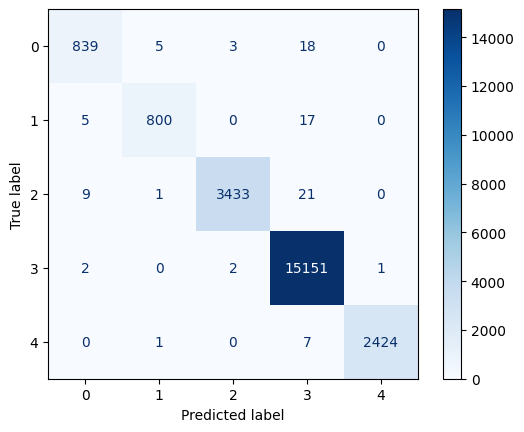

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(testY, pipe.predict(testX))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [20]:
import joblib

joblib.dump(pipe, 'request_predictor.joblib')

['request_predictor.joblib']